In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/avocado-prices/avocado.csv


# Exploring the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("../input/avocado-prices/avocado.csv")
data.head()

pd.options.display.float_format = '{:,.2f}'.format

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
data.shape

(18249, 14)

In [5]:
#Looking at the different regions

data["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [6]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,"18,249.00","18,249.00","18,249.00","18,249.00","18,249.00","18,249.00","18,249.00","18,249.00","18,249.00","18,249.00","18,249.00"
mean,24.23,1.41,"850,644.01","293,008.42","295,154.57","22,839.74","239,639.20","182,194.69","54,338.09","3,106.43","2,016.15"
std,15.48,0.40,"3,453,545.36","1,264,989.08","1,204,120.40","107,464.07","986,242.40","746,178.51","243,965.96","17,692.89",0.94
min,0.00,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"2,015.00"
25%,10.00,1.10,"10,838.58",854.07,"3,008.78",0.00,"5,088.64","2,849.42",127.47,0.00,"2,015.00"
50%,24.00,1.37,"107,376.76","8,645.30","29,061.02",184.99,"39,743.83","26,362.82","2,647.71",0.00,"2,016.00"
75%,38.00,1.66,"432,962.29","111,020.20","150,206.86","6,243.42","110,783.37","83,337.67","22,029.25",132.50,"2,017.00"
max,52.00,3.25,"62,505,646.52","22,743,616.17","20,470,572.61","2,546,439.11","19,373,134.37","13,384,586.80","5,719,096.61","551,693.65","2,018.00"


# General avocado trends
1. Look at average price over time.
2. Look at average volume sold over time.
3. Is there a correlation between price and volume?

In [7]:
# Adding month to the dataset

data['month'] = pd.DatetimeIndex(data['Date']).month
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0,2015-12-27,1.33,"64,236.62","1,036.74","54,454.85",48.16,"8,696.87","8,603.62",93.25,0.00,conventional,2015,Albany,12
1,1,2015-12-20,1.35,"54,876.98",674.28,"44,638.81",58.33,"9,505.56","9,408.07",97.49,0.00,conventional,2015,Albany,12
2,2,2015-12-13,0.93,"118,220.22",794.70,"109,149.67",130.50,"8,145.35","8,042.21",103.14,0.00,conventional,2015,Albany,12
3,3,2015-12-06,1.08,"78,992.15","1,132.00","71,976.41",72.58,"5,811.16","5,677.40",133.76,0.00,conventional,2015,Albany,12
4,4,2015-11-29,1.28,"51,039.60",941.48,"43,838.39",75.78,"6,183.95","5,986.26",197.69,0.00,conventional,2015,Albany,11


In [8]:
prices = pd.pivot_table(data, values = "AveragePrice", index = "month", columns = "year")

<AxesSubplot:title={'center':'Average Avocado Price'}, xlabel='Month', ylabel='Price'>

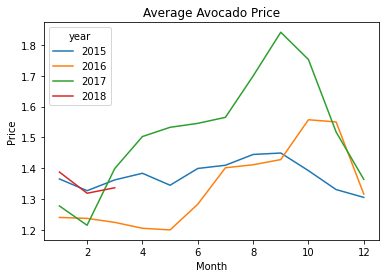

In [9]:
prices.plot.line(title = "Average Avocado Price", ylabel = "Price", xlabel = "Month")

Avocado prices tend to increase between July to November each year.

In [10]:
volume = pd.pivot_table(data, values = "Total Volume", index = "month", columns = "year")

<AxesSubplot:title={'center':'Average Volume Sold'}, xlabel='Month', ylabel='Volume'>

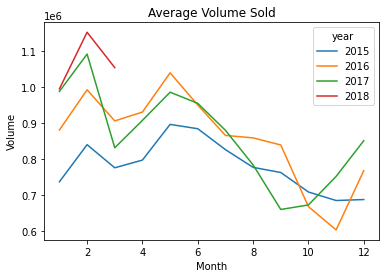

In [11]:
volume.plot.line(title = "Average Volume Sold", ylabel = "Volume", xlabel = "Month")

Volume of avocados sold tends to spike in February and May before decreasing gradually until November.

In [12]:
p2015 = prices[2015]
v2015 = volume[2015]
table2015 = pd.concat([p2015, v2015], axis = 1)
table2015.columns = ["Price", "Volume"]

p2016 = prices[2016]
v2016 = volume[2016]
table2016 = pd.concat([p2016, v2016], axis = 1)
table2016.columns = ["Price", "Volume"]

p2017 = prices[2017]
v2017 = volume[2017]
table2017 = pd.concat([p2017, v2017], axis = 1)
table2017.columns = ["Price", "Volume"]

p2018 = prices[2018]
v2018 = volume[2018]
table2018 = pd.concat([p2018, v2018], axis = 1)
table2018.columns = ["Price", "Volume"]

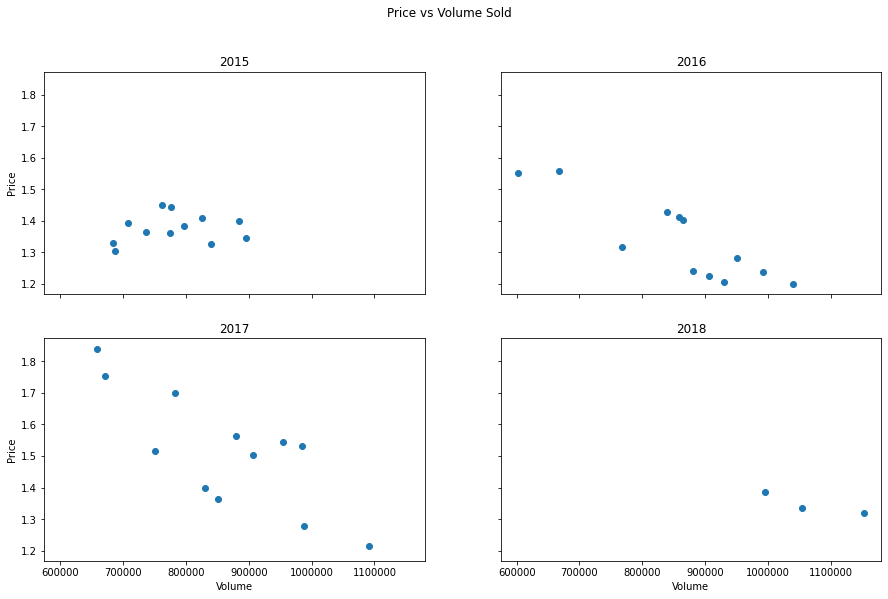

In [13]:
fig, axs = plt.subplots(2,2, sharex = True, sharey = True)
fig.suptitle("Price vs Volume Sold")
fig.set_size_inches(15, 9)

axs[0,0].scatter(table2015["Volume"],table2015["Price"])
axs[0,0].set_title('2015')
axs[0,0].set(ylabel = "Price")

axs[0,1].scatter(table2016["Volume"],table2016["Price"])
axs[0,1].set_title('2016')

axs[1,0].scatter(table2017["Volume"],table2017["Price"])
axs[1,0].set_title('2017')
axs[1,0].set(xlabel = "Volume", ylabel = "Price")

axs[1,1].scatter(table2018["Volume"],table2018["Price"])
axs[1,1].set_title('2018')
axs[1,1].set(xlabel = "Volume")
axs[1,1].ticklabel_format(useOffset=False, style='plain')



- In 2015, price changes did not have much effect on the total volume of avocado sold.
- In 2016, 2017, 2018, price and volume sold were negatively correlated, obeying the law of demand.
- The overall demand for avocados increased from year to year, indicating their increasing popularity.

# Avocado Popularity by Region
- Which 5 regions consumes the most and least avocados.
- Has the demand for avocados across these regions been increasing from year to year?

In [14]:
regions = pd.pivot_table(data, values = "Total Volume", index = "region", aggfunc=np.sum)
regions.sort_values("Total Volume", ascending = False).head()

,Total Volume
region,
TotalUS,"5,864,740,181.80"
West,"1,086,779,155.75"
California,"1,028,981,653.17"
SouthCentral,"1,011,279,618.83"
Northeast,"713,280,909.56"


Some of the regions are cities, some are states, and some cover several states / areas. Because of this, we will look at the top and bottom cities only.

Top 5:
- Los Angeles
- New York
- DallasFtWorth (Dallas Fort Worth)
- Houston
- PhoneixTucson (Tucson)

Bottom 5:
- Louisville
- Albany
- Spokane
- Boise
- Syracuse


In [15]:
topcities = data[(data["region"] == "LosAngeles") | (data["region"] == "NewYork") | 
                 (data["region"] == "DallasFtWorth") | (data["region"] == "Houston") | 
                 (data["region"] == "PhoenixTucson")]

topcities

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
572,0,2015-12-27,0.80,"1,020,390.64","494,425.64","276,556.76","84,912.97","164,495.27","136,560.04","12,277.70","15,657.53",conventional,2015,DallasFtWorth,12
573,1,2015-12-20,0.82,"928,051.16","439,792.68","257,532.45","91,158.34","139,567.69","103,511.91","10,331.25","25,724.53",conventional,2015,DallasFtWorth,12
574,2,2015-12-13,0.79,"980,891.18","476,178.99","319,789.56","62,436.80","122,485.83","114,978.22","7,472.99",34.62,conventional,2015,DallasFtWorth,12
575,3,2015-12-06,0.74,"1,054,849.97","514,160.41","412,692.22","8,533.47","119,463.87","108,772.12","10,525.27",166.48,conventional,2015,DallasFtWorth,12
576,4,2015-11-29,0.80,"839,818.87","477,944.48","244,879.52","6,211.50","110,783.37","96,799.40","13,967.44",16.53,conventional,2015,DallasFtWorth,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18004,7,2018-02-04,1.62,"14,456.10","2,260.81","2,011.22",0.00,"10,184.07","10,169.69",14.38,0.00,organic,2018,PhoenixTucson,2
18005,8,2018-01-28,1.69,"13,125.79","1,802.37","2,243.06",0.00,"9,080.36","9,073.81",6.55,0.00,organic,2018,PhoenixTucson,1
18006,9,2018-01-21,1.78,"12,112.82","2,178.78","1,901.41",0.00,"8,032.63","8,031.33",1.30,0.00,organic,2018,PhoenixTucson,1
18007,10,2018-01-14,1.77,"13,514.36","3,618.90","2,795.53",0.00,"7,099.93","7,086.72",13.21,0.00,organic,2018,PhoenixTucson,1


In [16]:
bottomcities = data[(data["region"] == "Louisville") | (data["region"] == "Albany") | 
                 (data["region"] == "Spokane") | (data["region"] == "Boise") | 
                 (data["region"] == "Syracuse")]

bottomcities

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0,2015-12-27,1.33,"64,236.62","1,036.74","54,454.85",48.16,"8,696.87","8,603.62",93.25,0.00,conventional,2015,Albany,12
1,1,2015-12-20,1.35,"54,876.98",674.28,"44,638.81",58.33,"9,505.56","9,408.07",97.49,0.00,conventional,2015,Albany,12
2,2,2015-12-13,0.93,"118,220.22",794.70,"109,149.67",130.50,"8,145.35","8,042.21",103.14,0.00,conventional,2015,Albany,12
3,3,2015-12-06,1.08,"78,992.15","1,132.00","71,976.41",72.58,"5,811.16","5,677.40",133.76,0.00,conventional,2015,Albany,12
4,4,2015-11-29,1.28,"51,039.60",941.48,"43,838.39",75.78,"6,183.95","5,986.26",197.69,0.00,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18196,7,2018-02-04,1.22,"6,294.16",85.22,152.09,0.00,"6,056.85","2,847.48","3,209.37",0.00,organic,2018,Syracuse,2
18197,8,2018-01-28,1.19,"6,393.58",30.09,128.49,0.00,"6,235.00","5,670.94",564.06,0.00,organic,2018,Syracuse,1
18198,9,2018-01-21,1.27,"3,159.80",92.12,73.17,0.00,"2,994.51","2,117.69",876.82,0.00,organic,2018,Syracuse,1
18199,10,2018-01-14,1.25,"4,343.09",116.19,64.16,0.00,"4,162.74","1,986.09","2,176.65",0.00,organic,2018,Syracuse,1


In [17]:
data["Date"].max()

'2018-03-25'

In [18]:
t_citiestable = pd.pivot_table(topcities, values = "Total Volume", index = "year", columns = "region", aggfunc=np.sum)

#remove 2018 as data only goes up to March 2018.
t_citiestable = t_citiestable.drop(2018, axis = 0)

t_citiestable

region,DallasFtWorth,Houston,LosAngeles,NewYork,PhoenixTucson
year,,,,,
2015,"60,311,308.63","55,387,471.37","148,220,692.98","70,607,635.91","57,176,285.48"
2016,"63,695,249.88","58,704,786.43","163,142,302.82","71,546,563.14","59,283,687.23"
2017,"66,240,982.71","69,093,092.89","158,481,174.24","74,850,673.31","61,170,534.26"


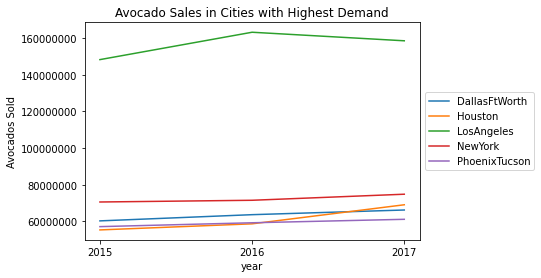

In [19]:
ax = t_citiestable.plot(xticks = t_citiestable.index)
ylab = ax.set_ylabel('Avocados Sold')
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_title('Avocado Sales in Cities with Highest Demand')

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [20]:
b_citiestable = pd.pivot_table(bottomcities, values = "Total Volume", index = "year", columns = "region", aggfunc=np.sum)

#remove 2018 column as data only goes up to March 2018.
b_citiestable = b_citiestable.drop(2018, axis = 0)

b_citiestable

region,Albany,Boise,Louisville,Spokane,Syracuse
year,,,,,
2015,"4,029,896.43","3,784,357.34","4,289,003.17","4,181,687.17","2,734,333.26"
2016,"5,264,335.59","4,653,509.53","5,076,328.78","5,006,166.54","3,429,368.74"
2017,"5,231,581.78","4,760,561.31","5,260,109.44","5,151,528.30","3,731,978.02"


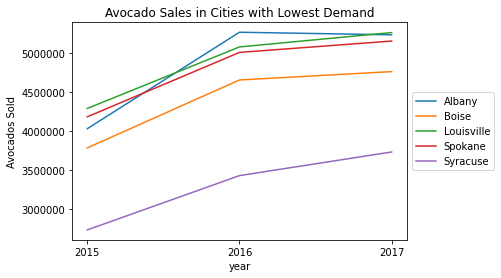

In [21]:
ax = b_citiestable.plot(xticks = b_citiestable.index)
ylab = ax.set_ylabel('Avocados Sold')
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_title('Avocado Sales in Cities with Lowest Demand')

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

- Avocado sales increased in cities with highest and lowest demand between 2015 & 2016. There was only a slight increase in 2017 from 2016.

- Price vs volume sold graph shows a drastic increase in avocado sales in 2018 in months Jan, Feb & March compared to other years.

# Sales & Popularity of Different Avocado Types

- Look at demand for different avocado types over the years.
- Which avocado types are more / less popular in different regions?

In [22]:
avo_4046 = pd.pivot_table(data, values = "4046", index = "region", aggfunc = np.sum)
avo_4046.sort_values("4046", ascending = False).head()

,4046
region,
TotalUS,"2,054,936,231.47"
SouthCentral,"535,041,386.70"
California,"398,967,012.93"
West,"398,590,531.18"
Southeast,"339,687,092.86"


Top Cities for 4046:
- LosAngeles
- PhoenixTucson
- DallasFtWorth
- Houston
- MiamiFtLauderdale

Bottom Cities for 4046:
- HartfordSpringfield
- Louisville
- Albany
- BuffaloRochester
- Syracuse

In [23]:
avo_4225 = pd.pivot_table(data, values = "4225", index = "region", aggfunc = np.sum)
avo_4225.sort_values("4225", ascending = False).head()

,4225
region,
TotalUS,"2,015,011,554.74"
Northeast,"474,484,663.53"
California,"351,491,401.99"
West,"300,758,923.39"
GreatLakes,"267,257,721.26"


Top Cities for 4225:
- NewYork
- LosAngeles
- Chicago
- SanFrancisco
- BaltimoreWashington

Bottom Cities for 4225:
- NewOrleansMobile
- Nashville
- StLouis
- Jacksonville
- Boise

In [24]:
avo_4770 = pd.pivot_table(data, values = "4770", index = "region", aggfunc = np.sum)
avo_4770.sort_values("4770", ascending = False).head()

,4770
region,
TotalUS,"156,175,183.13"
GreatLakes,"50,075,971.25"
California,"31,841,045.54"
SouthCentral,"22,395,793.74"
West,"20,356,070.87"


Top Cities for 4770:
- Chicago
- LosAngeles
- Detroit
- Houston
- DallasFtWorth

Bottom Cities for 4770:
- Orlando
- Tampa
- Syracuse
- Roanoke
- StLouis

In [25]:
avo_types = pd.pivot_table(data, values = ["4046", "4225", "4770", "Total Volume"], index = "year", aggfunc = np.sum )
avo_types

,4046,4225,4770,Total Volume
year,,,,
2015,"1,709,449,981.34","1,761,054,036.12","142,772,394.55","4,385,468,662.04"
2016,"1,525,122,892.30","1,672,728,288.00","159,879,845.01","4,820,889,891.83"
2017,"1,652,038,131.52","1,544,734,719.53","91,217,507.78","4,934,305,699.27"
2018,"460,499,734.10","407,758,674.28","22,932,594.79","1,382,738,340.26"


In [26]:
avo_types = avo_types.drop(2018, axis = 0)

In [27]:
avo_types = avo_types.drop("Total Volume", axis = 1)

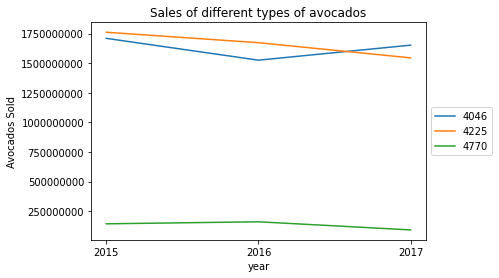

In [28]:
ax = avo_types.plot(xticks = avo_types.index)
ylab = ax.set_ylabel('Avocados Sold')
ax.ticklabel_format(useOffset=False, style='plain')

ax.set_title('Sales of different types of avocados')

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

- 4770 variety decreased in demand by 42.9% between 2016 and 2017.
- 4225 variety decreased in demand by 5% and 7% (compared to the previous year) in 2016 and 2017 respectively.
- All varities decreased in demand in 2017 compared to 2015. 

- Total volume of avocados sold has increased YoY, suggesting other varieties are becoming more popular.

In [29]:
avo_types = pd.pivot_table(data, values = ["4046", "4225", "4770", "Total Volume"], index = "year", aggfunc = np.sum )

avo_types["Other"] = avo_types["Total Volume"] - avo_types["4046"] - avo_types["4225"] - avo_types["4770"]
avo_pie = avo_types.drop("Total Volume", axis = 1)

avo_pie

,4046,4225,4770,Other
year,,,,
2015,"1,709,449,981.34","1,761,054,036.12","142,772,394.55","772,192,250.03"
2016,"1,525,122,892.30","1,672,728,288.00","159,879,845.01","1,463,158,866.52"
2017,"1,652,038,131.52","1,544,734,719.53","91,217,507.78","1,646,315,340.44"
2018,"460,499,734.10","407,758,674.28","22,932,594.79","491,547,337.09"


Text(0.5, 1.0, '2018')

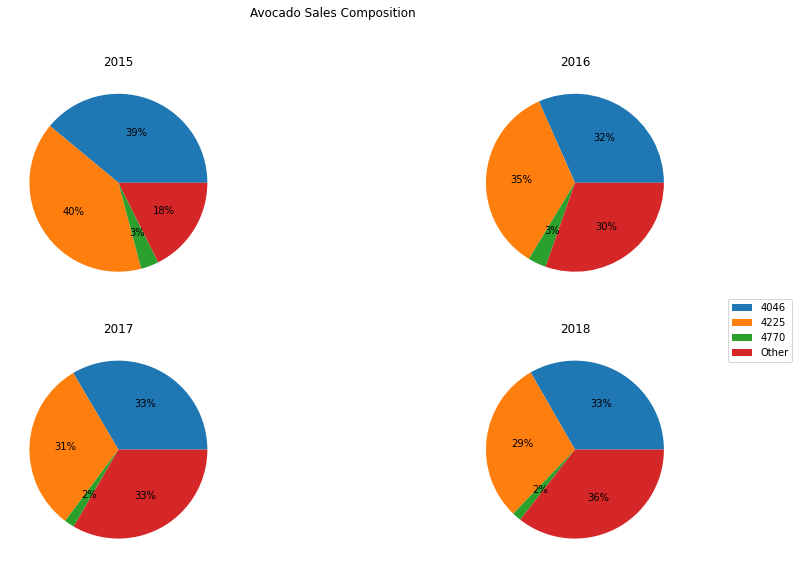

In [30]:
fig, axs = plt.subplots(2,2)
fig.suptitle("Avocado Sales Composition")
fig.set_size_inches(15, 9)

axs[0,0].pie(avo_pie.iloc[0], autopct = '%.0f%%')
axs[0,0].set_title('2015')

axs[0,1].pie(avo_pie.iloc[1], autopct = '%.0f%%')
axs[0,1].set_title('2016')
axs[0,1].legend(avo_pie.columns, bbox_to_anchor=(1.5 , 0))

axs[1,0].pie(avo_pie.iloc[2], autopct = '%.0f%%')
axs[1,0].set_title('2017')

axs[1,1].pie(avo_pie.iloc[3], autopct = '%.0f%%')
axs[1,1].set_title('2018')


# Sales by Bag Type
- Which bags are more popular?
- What are the trends?


In [31]:
bags = pd.pivot_table(data, index = "year", values = ["Large Bags", "Small Bags", "XLarge Bags"], aggfunc = np.sum)
bags

,Large Bags,Small Bags,XLarge Bags
year,,,
2015,"132,066,400.48","634,682,705.27","5,443,128.28"
2016,"336,626,342.06","1,106,494,239.62","20,038,284.84"
2017,"399,339,040.13","1,222,952,524.87","23,997,172.34"
2018,"123,583,987.88","360,741,367.75","7,210,591.87"


Text(0.5, 1.0, '2018')

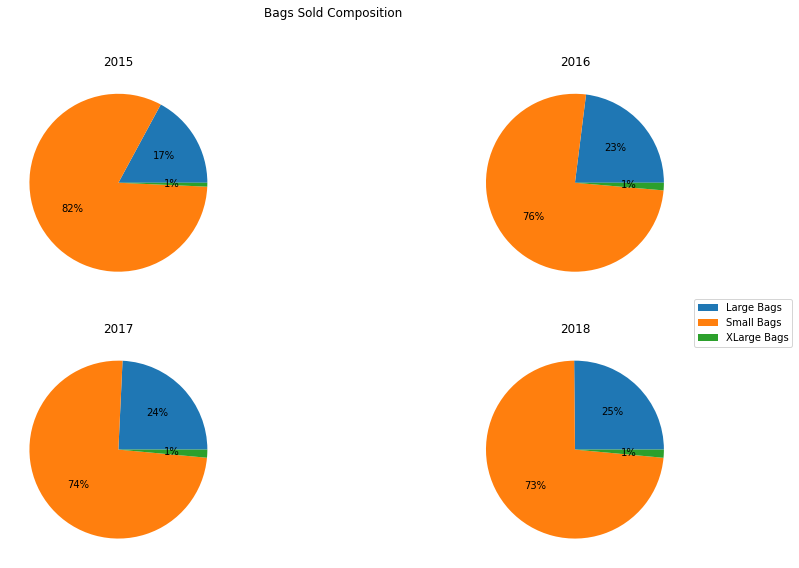

In [32]:
fig, axs = plt.subplots(2,2)
fig.suptitle("Bags Sold Composition")
fig.set_size_inches(15, 9)

axs[0,0].pie(bags.iloc[0], autopct = '%.0f%%')
axs[0,0].set_title('2015')

axs[0,1].pie(bags.iloc[1], autopct = '%.0f%%')
axs[0,1].set_title('2016')
axs[0,1].legend(bags.columns, bbox_to_anchor=(1.5 , 0))

axs[1,0].pie(bags.iloc[2], autopct = '%.0f%%')
axs[1,0].set_title('2017')

axs[1,1].pie(bags.iloc[3], autopct = '%.0f%%')
axs[1,1].set_title('2018')


An increasingly greater proportion of large avocado bags are being sold instead of small bags. This could be due to the rising popularity of avocados and eating them more regularly.

In [33]:
bags = bags.drop(2018, axis = 0)

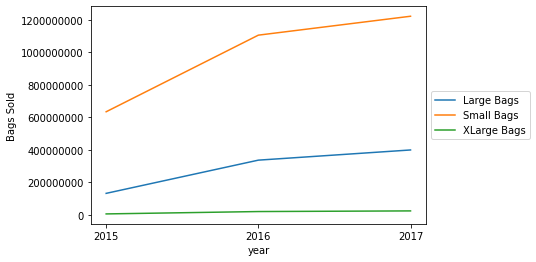

In [34]:
ax = bags.plot(xticks = bags.index)
ylab = ax.set_ylabel('Bags Sold')
ax.ticklabel_format(useOffset=False, style='plain')

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

More bags of each type are being sold. There was a more drastic increase in 2016 than 2017.

# Conventional or Organic?

In [35]:
# Split data by year

data_2015 = data[data["year"] == 2015]
data_2016 = data[data["year"] == 2016]
data_2017 = data[data["year"] == 2017]
data_2018 = data[data["year"] == 2018]

In [36]:
years = [2015, 2016, 2017]
dfs = [data_2015, data_2016, data_2017, data_2018]
con_tot = []
org_tot = []

In [37]:
year = 2015
for df in dfs:
    
    c_year = df[df["type"] == "conventional"]
    o_year = df[df["type"] == "organic"]

    c_year_tot = np.round(c_year["Total Volume"].sum())
    o_year_tot = np.round(o_year["Total Volume"].sum())

    print(c_year_tot, "bags of conventional avocados sold in", year)
    print(o_year_tot, "bags of organic avocados sold in", year)

    con_tot.append(c_year_tot)
    org_tot.append(o_year_tot)
    
    year += 1

4296599236.0 bags of conventional avocados sold in 2015
88869426.0 bags of organic avocados sold in 2015
4690249813.0 bags of conventional avocados sold in 2016
130640079.0 bags of organic avocados sold in 2016
4766165793.0 bags of conventional avocados sold in 2017
168139906.0 bags of organic avocados sold in 2017
1334206069.0 bags of conventional avocados sold in 2018
48532271.0 bags of organic avocados sold in 2018


In [38]:
years.append(2018)

In [39]:
con_org_dic = {"Conventional": con_tot, "Organic": org_tot}
con_org = pd.DataFrame(con_org_dic, index = years)
con_org

,Conventional,Organic
2015,"4,296,599,236.00","88,869,426.00"
2016,"4,690,249,813.00","130,640,079.00"
2017,"4,766,165,793.00","168,139,906.00"
2018,"1,334,206,069.00","48,532,271.00"


Text(0.5, 1.0, '2018')

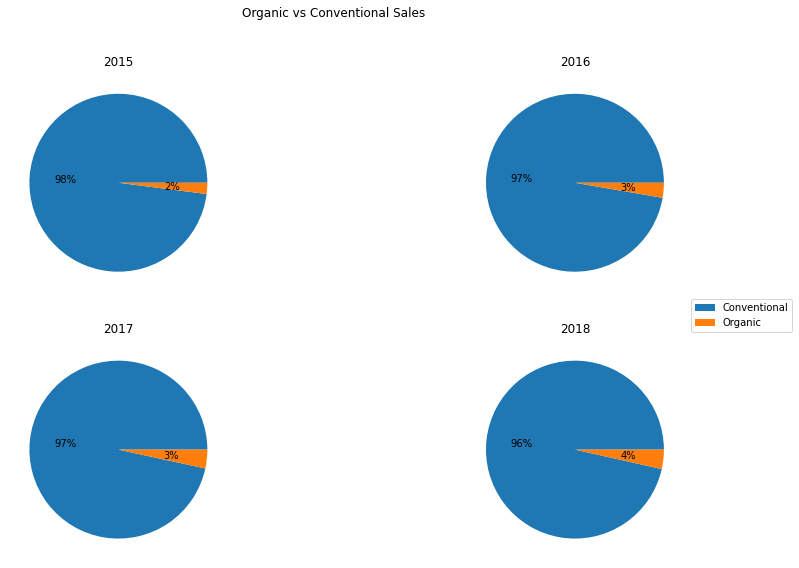

In [40]:
fig, axs = plt.subplots(2,2)
fig.suptitle("Organic vs Conventional Sales")
fig.set_size_inches(15, 9)

axs[0,0].pie(con_org.iloc[0], autopct = '%.0f%%')
axs[0,0].set_title('2015')

axs[0,1].pie(con_org.iloc[1], autopct = '%.0f%%')
axs[0,1].set_title('2016')
axs[0,1].legend(con_org.columns, bbox_to_anchor=(1.5 , 0))

axs[1,0].pie(con_org.iloc[2], autopct = '%.0f%%')
axs[1,0].set_title('2017')

axs[1,1].pie(con_org.iloc[3], autopct = '%.0f%%')
axs[1,1].set_title('2018')

- Proportion of organic avocados being sold is increasing every year.
- Suggests a shift in health awareness and perhaps wealth.

In [41]:
con_org = con_org.drop(2018, axis = 0)

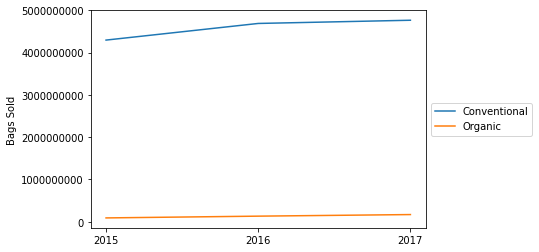

In [42]:
ax = con_org.plot(xticks = con_org.index)
ylab = ax.set_ylabel('Bags Sold')
ax.ticklabel_format(useOffset=False, style='plain')

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Conventional to Organic Ratio by Region

In [46]:
conventional = data[data["type"] == "conventional"]
organic = data[data["type"] == "organic"]

In [47]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0,2015-12-27,1.33,"64,236.62","1,036.74","54,454.85",48.16,"8,696.87","8,603.62",93.25,0.00,conventional,2015,Albany,12
1,1,2015-12-20,1.35,"54,876.98",674.28,"44,638.81",58.33,"9,505.56","9,408.07",97.49,0.00,conventional,2015,Albany,12
2,2,2015-12-13,0.93,"118,220.22",794.70,"109,149.67",130.50,"8,145.35","8,042.21",103.14,0.00,conventional,2015,Albany,12
3,3,2015-12-06,1.08,"78,992.15","1,132.00","71,976.41",72.58,"5,811.16","5,677.40",133.76,0.00,conventional,2015,Albany,12
4,4,2015-11-29,1.28,"51,039.60",941.48,"43,838.39",75.78,"6,183.95","5,986.26",197.69,0.00,conventional,2015,Albany,11


In [77]:
con_ratio = pd.pivot_table(conventional, index = "region", columns = "type", values = "Total Volume", aggfunc = np.sum)
org_ratio = pd.pivot_table(organic, index = "region", columns = "type", values = "Total Volume", aggfunc = np.sum)

In [84]:
con_org_ratio = pd.concat([con_ratio, org_ratio], axis = 1)
con_org_ratio["Total"] = con_org_ratio["conventional"] + con_org_ratio["organic"]

con_org_ratio["% Organic"] = con_org_ratio["organic"] / con_org_ratio["Total"] *100

con_org_ratio.sort_values("% Organic", ascending = False).head(8)

type,conventional,organic,Total,% Organic
region,,,,
Seattle,"101,850,663.17","7,363,514.79","109,214,177.96",6.74
CincinnatiDayton,"41,884,098.13","2,637,909.44","44,522,007.57",5.92
Roanoke,"23,652,751.25","1,389,259.56","25,042,010.81",5.55
Pittsburgh,"17,831,904.92","974,440.89","18,806,345.81",5.18
Portland,"105,041,197.70","5,511,013.90","110,552,211.60",4.98
Columbus,"28,606,217.74","1,387,143.68","29,993,361.42",4.62
Denver,"132,820,397.32","6,082,138.67","138,902,535.99",4.38
Detroit,"60,747,049.64","2,675,369.74","63,422,419.38",4.22


In [86]:
con_org_ratio.sort_values("% Organic", ascending = False).tail(8)

type,conventional,organic,Total,% Organic
region,,,,
WestTexNewMexico,"141,986,735.39","2,535,104.39","144,521,839.78",1.75
DallasFtWorth,"204,909,931.02","3,509,355.53","208,419,286.55",1.68
Southeast,"605,198,753.21","10,039,655.90","615,238,409.11",1.63
Orlando,"57,776,051.66","884,652.23","58,660,703.89",1.51
NewOrleansMobile,"45,067,491.34","627,645.24","45,695,136.58",1.37
Tampa,"65,288,272.26","716,267.05","66,004,539.31",1.09
PhoenixTucson,"193,599,800.95","2,043,511.55","195,643,312.50",1.04
MiamiFtLauderdale,"97,010,898.76","662,325.27","97,673,224.03",0.68


In [89]:
con_org_ratio["% Organic"].describe()

count   54.00
mean     3.07
std      1.25
min      0.68
25%      2.22
50%      3.01
75%      3.74
max      6.74
Name: % Organic, dtype: float64

% Organic avocados sold can vary a bit across regions. This could be due to income, culture, and other lifestyle habits / influences.

# Conclusion

- Price fluctuates a lot between 1.2 and 1.9 over 4 years.
- Price is highest in September, lowest in Feb.
- Volume sold is highest in Febrary and May, lowest in October.
- Avocados are increasing in popularity every year across most regions.
- Highest and lowest demand for various avocado SKUs vary across cities but are generally consistent.
- Other SKUs of avocado are becoming more popular than the ones listed in the dataset,
- Big bags are becoming more popular every year, however small bags still dominate at 70%+.
- Organic varieties are increasing in popularity, increasing from 2% - 4% over 4 years.
- % organic avocados sold by region ranges from 0.68% to 6.74%.
